In [2]:
!git clone https://github.com/Francesco9932/financial-sentiment-analysis

Cloning into 'financial-sentiment-analysis'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 13 (delta 3), reused 9 (delta 2), pack-reused 0
Unpacking objects: 100% (13/13), 234.54 KiB | 1.54 MiB/s, done.


In [3]:
%cd financial-sentiment-analysis/

/content/financial-sentiment-analysis


In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('all-data.csv', encoding="latin-1",
                 names=['sentiment', 'news headline'])
df.head()

,sentiment,news headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


<Axes: >

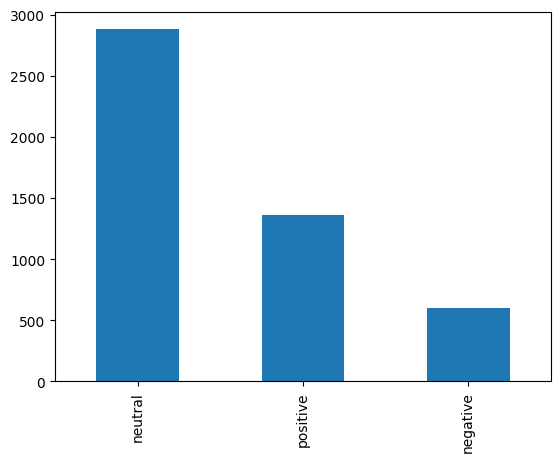

In [6]:
df['sentiment'].value_counts().plot(kind='bar')

In [7]:
print("original shape: ", df.shape)
df = df.drop_duplicates()
print("after drop duplicates shape: ", df.shape)
dd_dn = df.dropna()
print("after drop null shape: ", df.shape)

original shape:  (4846, 2)
after drop duplicates shape:  (4840, 2)
after drop null shape:  (4840, 2)


In [8]:
df['news headline'][1]

'Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .'

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['news headline'])
sequences = tokenizer.texts_to_sequences(df['news headline'])
print("Vocab length:", len(tokenizer.word_index) + 1)

max_seq_length = np.max(list(map(lambda x: len(x), sequences)))
print("Maximum sequence length:", max_seq_length)
sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

Vocab length: 10123
Maximum sequence length: 71


In [11]:
label_mapping = {
        'negative': 0,
        'neutral': 1,
        'positive': 2
    }
    
y = df['sentiment'].replace(label_mapping)

In [12]:
print(y)

0       1
1       1
2       0
3       2
4       2
       ..
4841    0
4842    1
4843    0
4844    0
4845    0
Name: sentiment, Length: 4840, dtype: int64


In [13]:
train_sequences, test_sequences, y_train, y_test = train_test_split(sequences, y, train_size=0.7, shuffle=True, random_state=1)

In [14]:
print('Train Set ->', train_sequences.shape, y_train.shape)
print('Test Set ->', test_sequences.shape, y_test.shape)

Train Set -> (3388, 71) (3388,)
Test Set -> (1452, 71) (1452,)


In [15]:
import tensorflow as tf


vocab_size = 10123
embedding_size = 128
epochs = 10


inputs = tf.keras.Input(shape=(train_sequences.shape[1],))
x = tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=embedding_size,
                              input_length=train_sequences.shape[1])(inputs)
x = tf.keras.layers.GRU(256, return_sequences=True, activation='tanh')(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_sequences,
                    y_train,
                    batch_size=32,
                    epochs=epochs)


Epoch 1/10
 41/106 [==========>...................] - ETA: 15s - loss: 0.9097 - accuracy: 0.6059

KeyboardInterrupt: ignored

In [ ]:
results = model.evaluate(test_sequences, y_test, verbose =  0)

print("Test Losss: {:.5f}".format(results[0]))
print("Test accuracy: {:.5f}%".format(results[1]  * 100))